# WEATHER PREDICTION

### IMPORTING REQUIRED PACKAGES

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

### LOADING DATA FROM DATA SOURCE

In [10]:
Weather_data = pd.read_csv('pune.csv',index_col='date_time')
Weather_data

,maxtempC,mintempC,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,,,,,,,,,,,
2017-01-01 01:00:00,31.0,17.0,11.0,6.0,20.0,09:15 AM,08:58 PM,07:07 AM,06:09 PM,20714.0,...,18.0,5.0,1,63,0.0,1014.0,18,10,82,2
2017-01-01 02:00:00,31.0,17.0,11.0,6.0,20.0,09:15 AM,08:58 PM,07:07 AM,06:09 PM,20715.0,...,18.0,5.0,0,63,0.0,1014.0,18,10,94,3
2017-01-01 03:00:00,31.0,17.0,11.0,6.0,20.0,09:15 AM,08:58 PM,07:07 AM,06:09 PM,20716.0,...,17.0,6.0,0,64,0.0,1014.0,17,10,105,3
2017-01-01 04:00:00,31.0,17.0,11.0,6.0,20.0,09:15 AM,08:58 PM,07:07 AM,06:09 PM,20717.0,...,19.0,7.0,1,57,0.0,1014.0,19,10,110,4
2017-01-01 05:00:00,31.0,17.0,NaN,6.0,20.0,09:15 AM,08:58 PM,07:07 AM,06:09 PM,20718.0,...,19.0,8.0,1,51,0.0,1015.0,19,10,115,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-11 19:00:00,35.0,23.0,11.8,7.0,56.0,12:40 PM,01:33 AM,06:46 AM,06:43 PM,66212.0,...,30.0,10.0,6,28,0.0,1009.0,30,10,235,7
2022-03-11 20:00:00,35.0,23.0,11.8,7.0,56.0,12:40 PM,01:33 AM,06:46 AM,06:43 PM,66213.0,...,29.0,14.0,7,29,0.0,1010.0,29,10,289,9
2022-03-11 21:00:00,35.0,23.0,11.8,7.0,56.0,12:40 PM,01:33 AM,06:46 AM,06:43 PM,66214.0,...,27.0,12.0,9,30,0.0,1012.0,27,10,343,12


KeyError: 'temp'

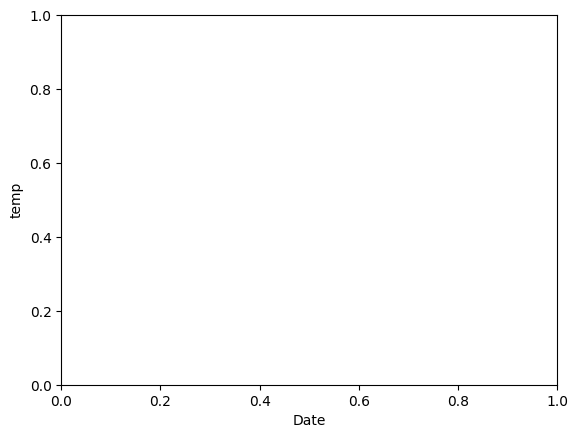

In [12]:
temp=(Weather_data['tempC']).astype(float)
plt.xlabel('Date')
plt.ylabel('temp')
plt.plot(Weather_data['temp'])
plt.title('date vs temp')

TypeError: 'value' must be an instance of str or bytes, not a float

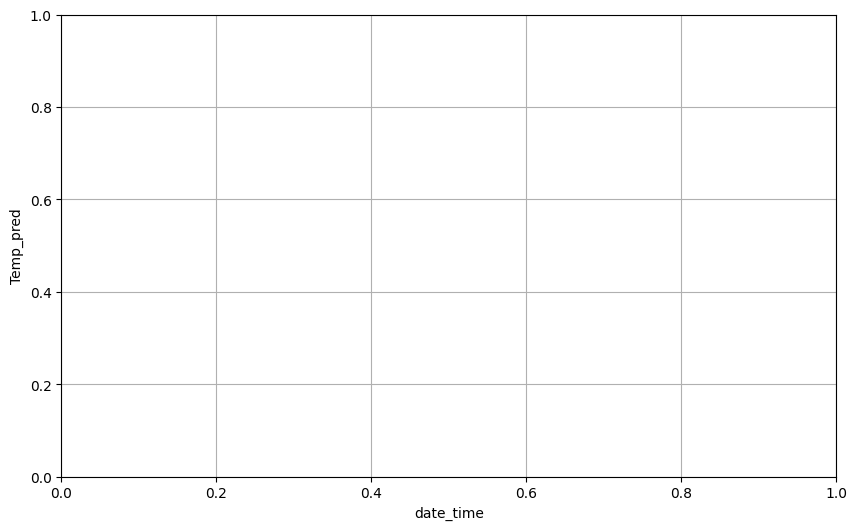

In [8]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('date_time')
plt.ylabel('Temp_pred')
plt.plot(Weather_data['tempC'])
plt.title('Date vs Temp')
plt.show()

In [ ]:
#Distribution of the dataset
df_temp = Weather_data['tempC']
df_temp.plot(kind='kde')

In [ ]:
result = seasonal_decompose(df_temp, model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

In [ ]:
# used to reduce the values
df_log = np.log(df_temp)

# get the moving average of last 15 days
moving_avg = df_log.rolling(15).mean()
# std_dev = df_log.rolling(15).std()

plt.legend(loc='best')
plt.title('Moving Average')
# plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()

In [ ]:
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]

plt.xlabel('date_time')
plt.ylabel('temp')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [ ]:
model_autoARIMA = auto_arima(
                      train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [ ]:
# Build Model
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_data, order=(1,1,2))  
fitted = model.fit()  
print(fitted.summary())

In [ ]:
# Forecast
# return_value = fitted.forecast(alpha=0.05)  # 95% conf
return_value = fitted.forecast(test_data, alpha=0.0)


In [ ]:
# Make a pandas series
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'blue', label='actual temp')
#plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.title('Temp Prediction')
plt.xlabel('date_time')
plt.ylabel('temp')
plt.legend(loc='upper left', fontsize=8)
plt.show()

## EXPLORATORY DATA ANALYSIS (EDA)

In [ ]:
df.info()

In [ ]:
df.describe()

## DATA PREPROCESSING

### Deleting Unnecessary Attributes

In [ ]:
df.drop(['date_time', 'moonrise', 'moonset', 'sunrise', 'sunset'], axis = 1, inplace = True)

### Finding The Missing Data (NaN Values)

In [ ]:
df.isna().sum()

### Filling The Missing Data

In [ ]:
df.mean()

In [ ]:
filled_df = df.fillna(df.mean())

In [ ]:
df.corr()

In [ ]:
sns.heatmap(df.corr())

In [ ]:
filled_df.isna().sum()

### Splitting Data into X and Y 

In [ ]:
X= filled_df.drop(['tempC','moon_illumination','DewPointC','cloudcover','precipMM','visibility','winddirDegree'],axis=1)
Y= filled_df['tempC']

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Assuming X and y are your feature matrix and target variable
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.7, random_state=12345)

# Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


# Create Lasso model with regularization strength (alpha)
lasso_model = Lasso(alpha=1)  # Adjust alpha as needed

# Fit the model
lasso_model.fit(x_train_scaled, y_train)

# Make predictions
y_pred = lasso_model.predict(x_test_scaled)


### Model Building

In [ ]:
from xgboost import XGBRegressor
model= XGBRegressor()
model.fit(y_test,y_pred)

In [ ]:
mae=mean_absolute_error(y_test,y_pred)
mae

In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mse

In [ ]:
from sklearn.metrics import r2_score
R2=r2_score(y_test,y_pred)
R2


In [ ]:
df.columns

In [ ]:
temp = model.predict([15])
print(temp)